In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


bc_data = pd.read_csv('binary_classification_data.csv')

In [10]:
bc_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [11]:
bc_data.columns = ['Mean_i', 'SD_i', 'EK_i', 'S_i', 'Mean_curve','SD_curve', 'EK_curve', 'S_curve', 'Class']

Mean of the integrated profile: Mean_i

Standard deviation of the integrated profile: SD_i

Excess kurtosis of the integrated profile: EK_i

Skewness of the integrated profile: S_i

Mean of the DM-SNR curve: Mean_curve

Standard deviation of the DM-SNR curve: SD_curve

Excess kurtosis of the DM-SNR curve: EK_curve

Skewness of the DM-SNR curve: S_curve

traget_class: Class (1인 경우 중성자별, 0인 경우 중성자별 아님)

In [12]:
bc_data

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


여기서 i는 실제로 관측한 값을 뜻한다(Observation)

curve는 DM-SNR Curve를 나타내며, DM-SNR Curve는 Dispersion Measure/Signal-to-Noise Ratio curve의 약자이다.

이 curve는 얼마나 전자에 라디오파가 영향을 받았느지를 뜻하는 것 같다...

이 숫자들은 평균, 표준편차처럼 통계관련 숫자이기에 단위가 존재하지 않음.

In [13]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mean_i      17898 non-null  float64
 1   SD_i        17898 non-null  float64
 2   EK_i        17898 non-null  float64
 3   S_i         17898 non-null  float64
 4   Mean_curve  17898 non-null  float64
 5   SD_curve    17898 non-null  float64
 6   EK_curve    17898 non-null  float64
 7   S_curve     17898 non-null  float64
 8   Class       17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [14]:
bc_data.describe()

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


0    16259
1     1639
Name: Class, dtype: int64

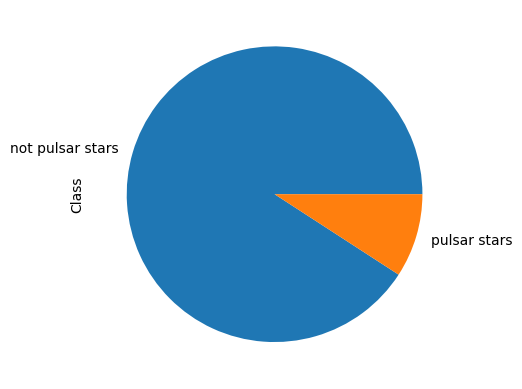

In [15]:
df = bc_data.copy()
df['Class'].value_counts().plot(kind='pie',labels=["not pulsar stars","pulsar stars"])
df['Class'].value_counts()

In [16]:
df.tail()

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


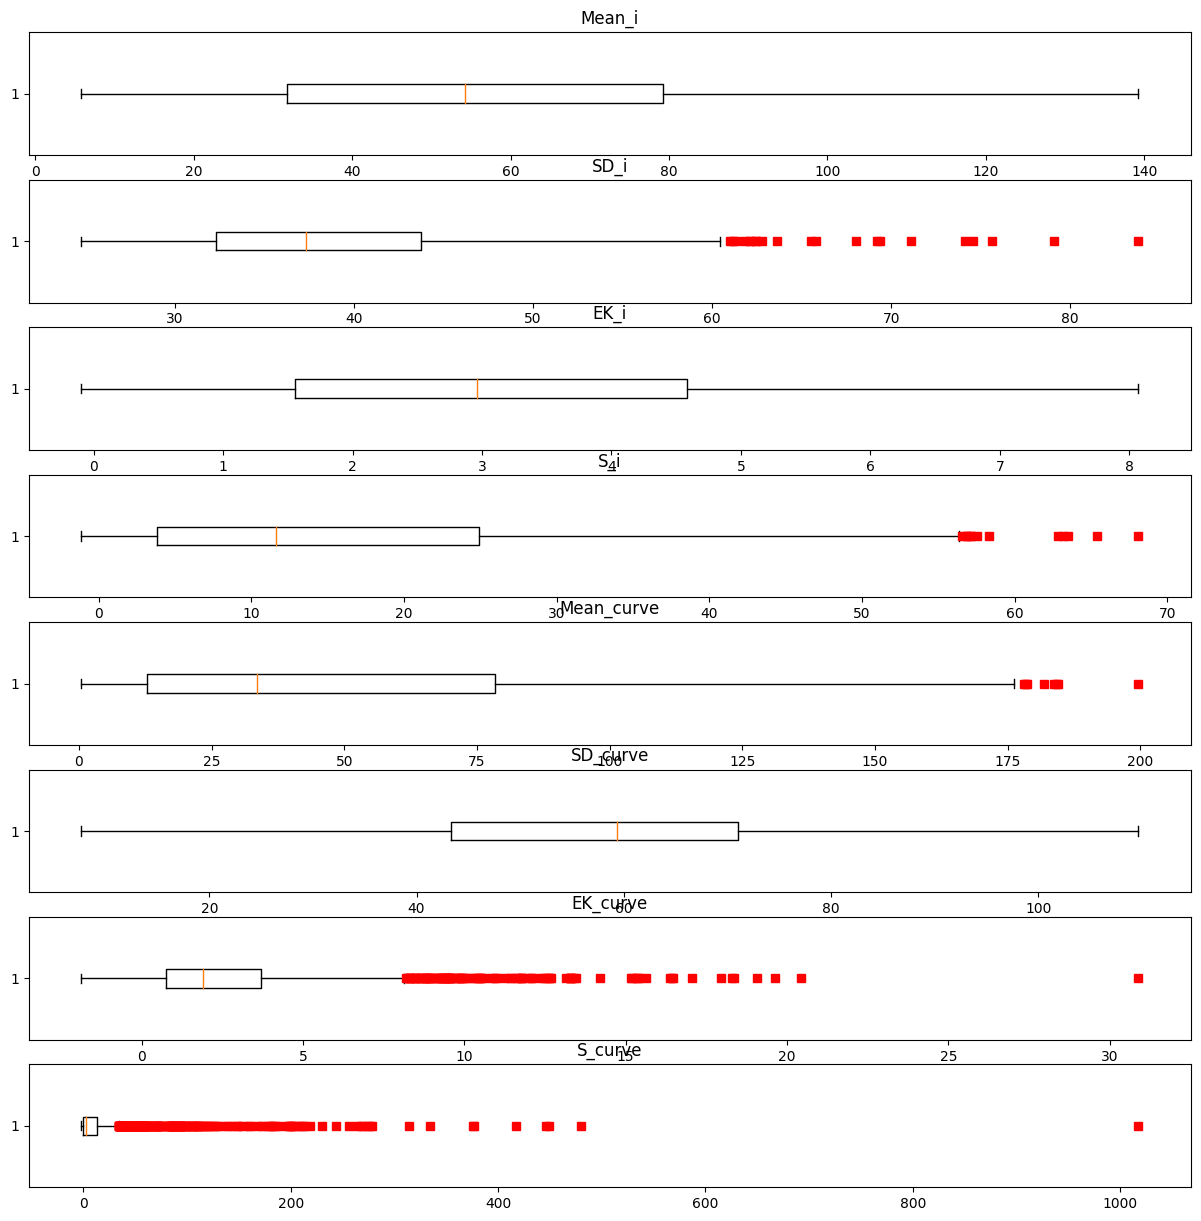

In [19]:
df_1 = df[df['Class']==1]

fig, axs = plt.subplots(8,1, figsize=(15, 15))

columns = df_1.columns

for ax, title in zip(axs.ravel(),columns):
  ax.boxplot(df_1[title],0,'rs',0)
  ax.set_title(title)

Upsampling 필요,



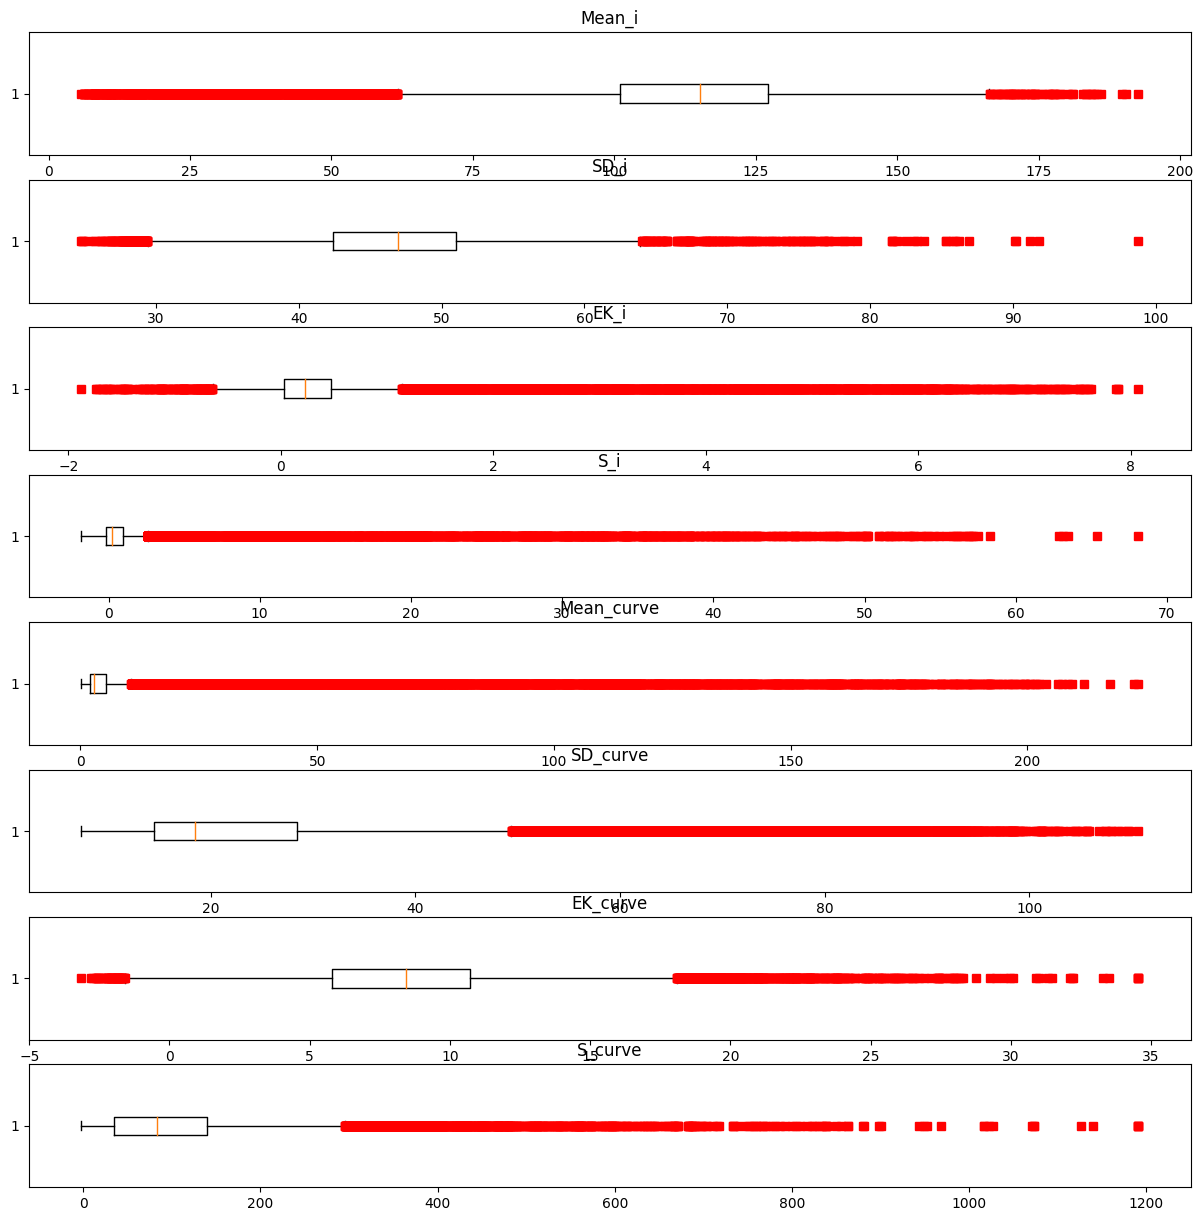

In [20]:
fig, axs = plt.subplots(8,1, figsize=(15, 15))

columns = df.columns

for ax, title in zip(axs.ravel(),columns):
  ax.boxplot(df[title],0,'rs',0)
  ax.set_title(title)

In [ ]:
ㅇ

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# 얼마나 이상치가 많은지 확인

Mean_i         26.156250
SD_i            8.647184
EK_i            0.446227
S_i             1.116355
Mean_curve      3.541179
SD_curve       13.990773
EK_curve        4.921454
S_curve       104.348826
Class           0.000000
dtype: float64


In [39]:
# 이상치를 제외한 데이터

df_s = df[~((df <(Q1 - 1.5 * IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)].reset_index(drop=True)

df_s

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
13166,106.875000,47.571328,0.199440,0.284964,3.079431,20.984455,8.427475,78.259366,0
13167,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
13168,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
13169,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0


In [40]:
df_s.describe()

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
count,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.0
mean,117.032685,47.292781,0.198426,0.282028,3.067885,19.009290,9.095732,106.015174,0.0
std,15.702347,5.301759,0.262784,0.684565,1.777364,6.340385,2.588293,61.794804,0.0
min,72.484375,32.405719,-0.642108,-1.185706,0.761706,10.521795,3.560846,11.638152,0.0
25%,106.304688,43.603153,0.014272,-0.211931,1.909699,14.344416,7.250476,58.541533,0.0
50%,117.359375,47.400543,0.185076,0.120480,2.558528,17.227806,8.941180,94.689800,0.0
75%,127.960938,51.062133,0.374754,0.600168,3.615385,22.015565,10.750754,140.851203,0.0
max,164.640625,63.872332,1.141208,2.601154,10.774247,47.377628,17.098489,295.514558,0.0


In [48]:
# 이상치만 모은 데이터

df_t = df[((df <(Q1 - 1.5 * IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)].reset_index(drop=True)

df_t

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
0,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
1,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
2,99.914062,43.919498,0.475729,0.781486,0.619565,9.440976,20.106639,475.680218,0
3,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
4,119.335938,47.506953,0.220317,0.645718,0.792642,9.540907,18.766540,441.513343,0
...,...,...,...,...,...,...,...,...,...
4722,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
4723,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
4724,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
4725,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0


In [49]:
df_t.describe()

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
count,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000
mean,94.493711,44.478591,1.256446,5.917043,39.214176,46.714745,6.096289,101.632625,0.346732
std,37.829275,9.652916,1.808620,10.926507,48.156281,27.543109,7.183459,179.745631,0.475980
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,71.398438,36.318520,0.087055,-0.083379,2.239967,16.369337,0.955731,0.113537,0.000000
50%,101.140625,44.786429,0.500670,0.945314,17.068562,49.061947,2.997185,8.037103,0.000000
75%,122.777344,50.791054,1.802975,5.266205,62.326923,69.246637,9.577383,108.941791,1.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [41]:
corr = df.select_dtypes('number').corr()

corr

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
Mean_i,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
SD_i,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
EK_i,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
S_i,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean_curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
SD_curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
EK_curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
S_curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
Class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


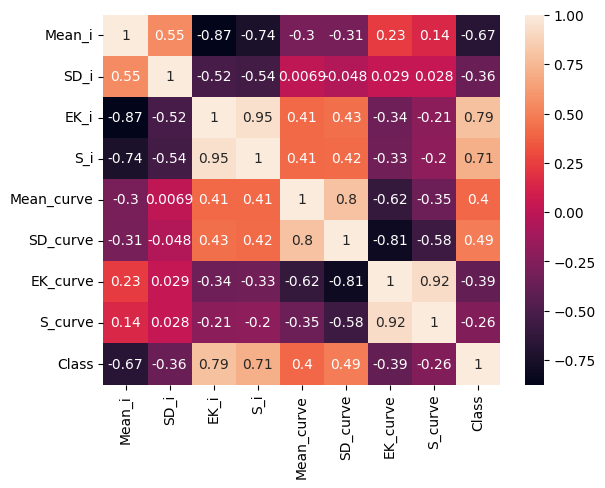

In [42]:
sns.heatmap(corr, annot=True);

# 모든 상관관계

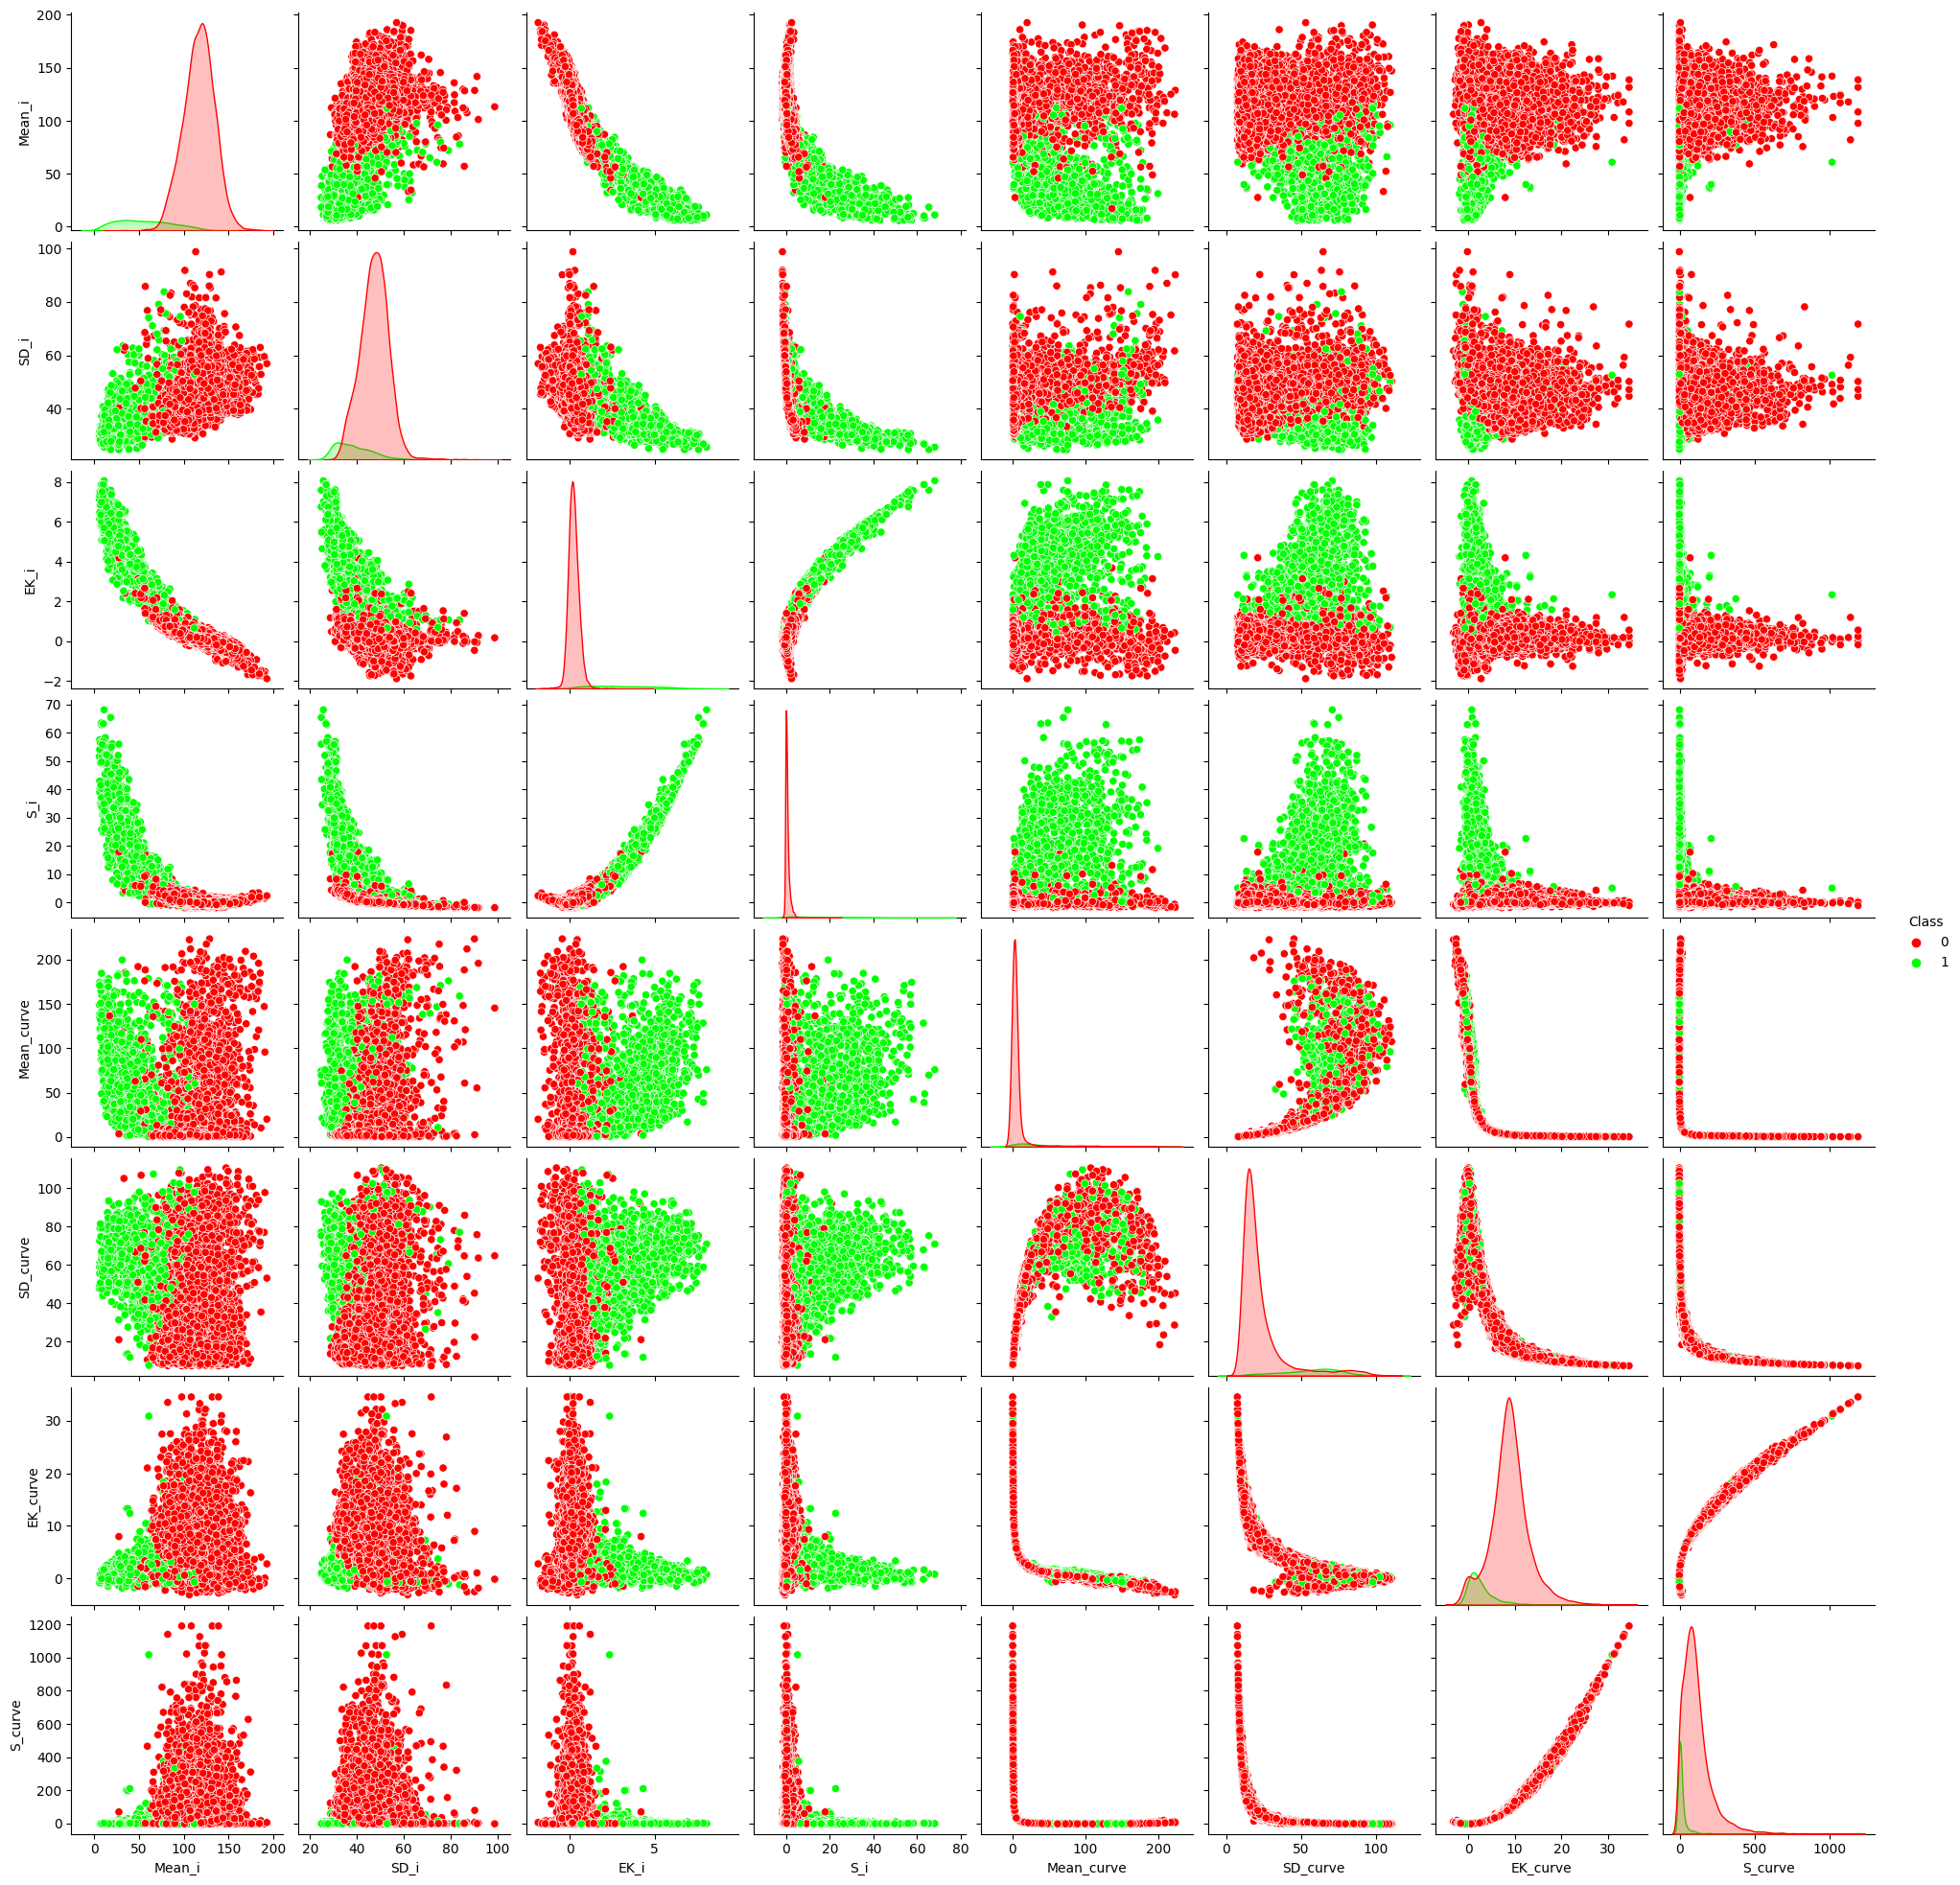

In [61]:
sns.pairplot(df, hue="Class", palette=["red","lime"])

상관관계와 각 카테고리만의 분포도를 보면, 모든 카테고리에서 타겟값들이 다르게 분포 되어있음.

따라서 eda가 필요 없어 보임.

In [43]:
corr1 = df_s.select_dtypes('number').corr()

corr1

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
Mean_i,1.000000,0.377945,-0.831168,-0.555384,0.100959,0.087416,-0.093169,-0.082905,NaN
SD_i,0.377945,1.000000,-0.369296,-0.862272,0.095148,0.088523,-0.082033,-0.076543,NaN
EK_i,-0.831168,-0.369296,1.000000,0.573774,-0.103389,-0.090078,0.091819,0.078850,NaN
S_i,-0.555384,-0.862272,0.573774,1.000000,-0.101003,-0.090171,0.089162,0.080842,NaN
Mean_curve,0.100959,0.095148,-0.103389,-0.101003,1.000000,0.940161,-0.861261,-0.776040,NaN
SD_curve,0.087416,0.088523,-0.090078,-0.090171,0.940161,1.000000,-0.835663,-0.805625,NaN
EK_curve,-0.093169,-0.082033,0.091819,0.089162,-0.861261,-0.835663,1.000000,0.974502,NaN
S_curve,-0.082905,-0.076543,0.078850,0.080842,-0.776040,-0.805625,0.974502,1.000000,NaN
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


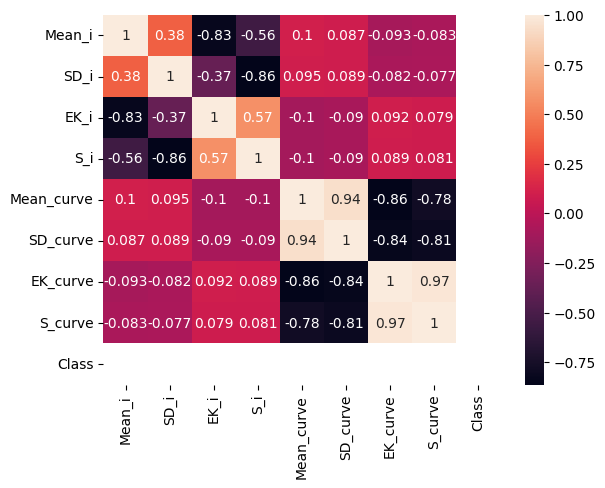

In [44]:
sns.heatmap(corr1, annot=True);

# 이상치 제외한 상관관계
# 상관관계가 대부분 낮기에 쓸 수 없음

In [50]:
corr2 = df_t.select_dtypes('number').corr()

corr2

,Mean_i,SD_i,EK_i,S_i,Mean_curve,SD_curve,EK_curve,S_curve,Class
Mean_i,1.000000,0.628107,-0.924050,-0.804524,-0.144822,-0.139491,0.233197,0.241460,-0.728109
SD_i,0.628107,1.000000,-0.615908,-0.624681,0.166980,0.094265,0.005200,0.079098,-0.435374
EK_i,-0.924050,-0.615908,1.000000,0.952767,0.243356,0.257037,-0.310460,-0.283654,0.755036
S_i,-0.804524,-0.624681,0.952767,1.000000,0.254827,0.249133,-0.288070,-0.255007,0.642593
Mean_curve,-0.144822,0.166980,0.243356,0.254827,1.000000,0.727085,-0.632931,-0.445653,0.160559
SD_curve,-0.139491,0.094265,0.257037,0.249133,0.727085,1.000000,-0.857541,-0.717703,0.258034
EK_curve,0.233197,0.005200,-0.310460,-0.288070,-0.632931,-0.857541,1.000000,0.956445,-0.338695
S_curve,0.241460,0.079098,-0.283654,-0.255007,-0.445653,-0.717703,0.956445,1.000000,-0.339288
Class,-0.728109,-0.435374,0.755036,0.642593,0.160559,0.258034,-0.338695,-0.339288,1.000000


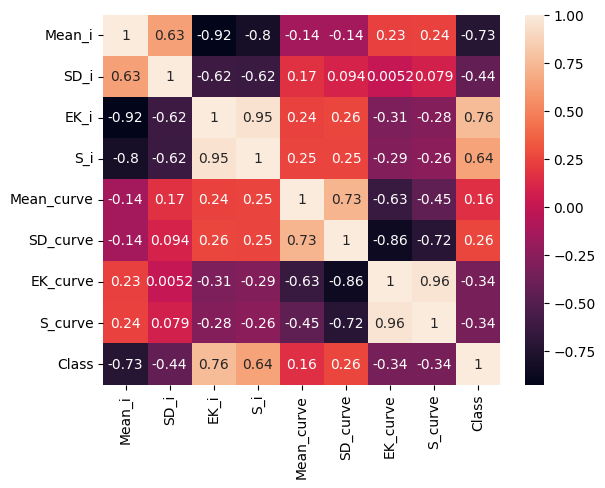

In [51]:
sns.heatmap(corr2, annot=True);

# 이상치만 포함한 상관관계

In [45]:
df[df['Mean_i']<115.078125]['Class'].value_counts()

0    7349
1    1598
Name: Class, dtype: int64

In [46]:
df[df['Mean_i']>115.078125]['Class'].value_counts()
# negative corr는 수가 커질 수록 0이 더 많은 것을 보여줌

0    8907
1      41
Name: Class, dtype: int64

integrated의 평균과 표준편차가 높고, curve의 초과첨도와 왜도가 낮을수록 타겟이 0일 가능성이 높음

반대로 integrated의 평균과 표준편차가 낮고, curve의 초과첨도와 왜도가 높을수록 타겟이 1일 가능성이 높음

이상치일수록 타겟이 1이고, 이상치를 다 없애버리면 타겟이 0만 남기에 이상치를 지우면 안됨

또한, 이상치에서 보인 점이 하나만 동떨어져있는게 아니라, 여러개가 같이 모여 있기에 지울 필요가 없어 보임.

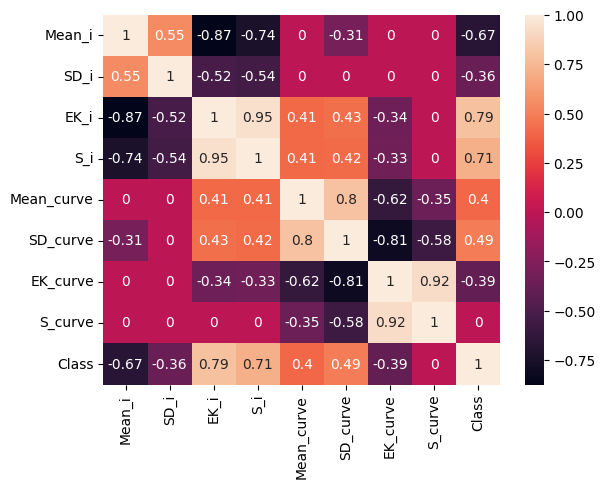

In [59]:
corr_fix = corr[((corr>0.3) | (corr<-0.3))].fillna(0)

sns.heatmap(corr_fix, annot=True);

In [79]:
pipe = make_pipeline(
    RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight="balanced"
        )
)
bc_data.columns = ['Mean_i', 'SD_i', 'EK_i', 'S_i', 'Mean_curve','SD_curve', 'EK_curve', 'S_curve', 'Class']
df = bc_data.copy()
y = df.pop('Class')
X = df
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)


pipe.fit(X_train, y_train)
print("훈련 정확도: ", pipe.score(X_train, y_train))
print("검증 정확도: ", pipe.score(X_val, y_val))

y_val_pred_rf = pipe.predict(X_val)

훈련 정확도:  0.9999301578432742
검증 정확도:  0.9812849162011174


In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_val_pred_rf, labels = pipe.classes_)

cm = pd.DataFrame(cm)
cm.columns = ['Predicted 0', 'Predicted 1']
cm.rename(index={0: "True 0", 1: "True 1"}, inplace = True)
cm

,Predicted 0,Predicted 1
True 0,3243,16
True 1,51,270


In [92]:
from sklearn.metrics import classification_report
print('Precision: ', round(270 / (270+51),2)) # TP / (TP+FP)
print('Recall: ', round(270 / (270+16),2)) # TP / (TP+FN)
print(classification_report(y_val, y_val_pred_rf))

Precision:  0.84
Recall:  0.94
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.84      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



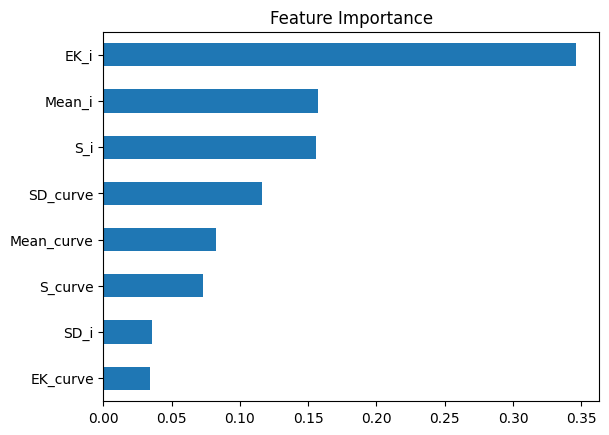

Text(0.5, 1.0, 'Cardinality')

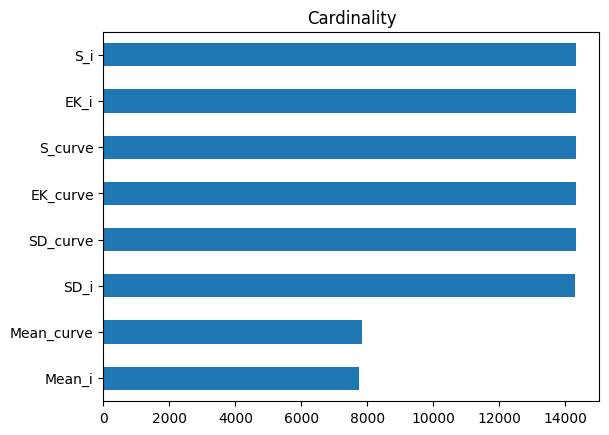

In [83]:
rf = pipe.named_steps["randomforestclassifier"]
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")

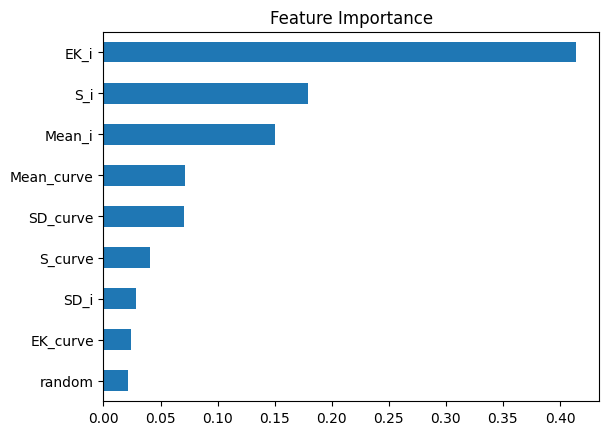

Text(0.5, 1.0, 'Cardinality')

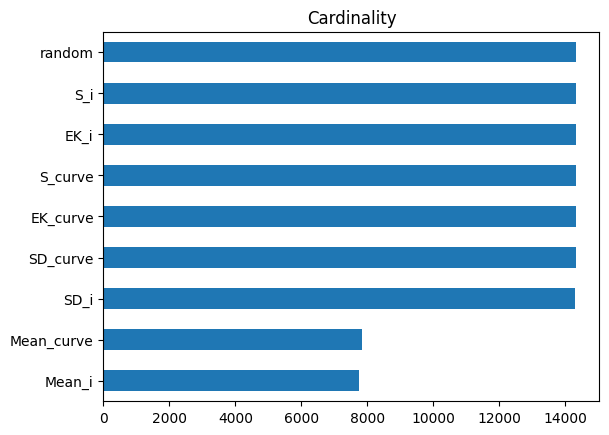

In [86]:
rand = np.random.RandomState(seed=2)

X_train_random_added = X_train.copy()
X_train_random_added["random"] = rand.randn(len(X_train))

pipe_random_added = pipe
pipe_random_added.fit(X_train_random_added, y_train)

rf = pipe_random_added.named_steps["randomforestclassifier"]
importances_random_added = pd.Series(
    rf.feature_importances_, X_train_random_added.columns
)

importances_random_added.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train_random_added.nunique().sort_values().plot.barh()
plt.title("Cardinality")

In [88]:
X.columns

Index(['Mean_i', 'SD_i', 'EK_i', 'S_i', 'Mean_curve', 'SD_curve', 'EK_curve',
       'S_curve'],
      dtype='object')

In [91]:
pipe.fit(X_train, y_train)
score = pipe.score(X_val, y_val)

print(f'Before Drop :: 검증 정확도 {score:.6f}')
dci = pd.Series(dtype=float)
features = ['Mean_i', 'SD_i', 'EK_i', 'S_i', 'Mean_curve', 'SD_curve', 'EK_curve',
       'S_curve']
for feature in features:
    p = pipe

    # feature을 drop하여 모델을 재학습합니다.
    p.fit(X_train.drop(columns=[feature], axis=1), y_train)
    score_dropped = p.score(X_val.drop(columns=[feature], axis=1), y_val)
    print(f"Drop {feature} :: 검증 정확도 {score_dropped:.6f}")

    # drop-column importance는 해당 특성을 drop했을 때의 성능 하락폭으로 정의됩니다.
    dci[feature] = score - score_dropped

Before Drop :: 검증 정확도 0.981285
Drop Mean_i :: 검증 정확도 0.981844
Drop SD_i :: 검증 정확도 0.981844
Drop EK_i :: 검증 정확도 0.979888
Drop S_i :: 검증 정확도 0.980726
Drop Mean_curve :: 검증 정확도 0.981564
Drop SD_curve :: 검증 정확도 0.982123
Drop EK_curve :: 검증 정확도 0.982123
Drop S_curve :: 검증 정확도 0.980447
